In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import metrics
import time

In [2]:
#Question 3a 
digits = datasets.load_digits()
xdigits = scale(digits.data)
labels = digits.target
n_digits = len(digits.target_names)
n_samples, n_features = xdigits.shape
print("n_classes: %i \nn_samples: %i \nn_features: %i"
      % (n_digits, n_samples, n_features))

n_classes: 10 
n_samples: 1797 
n_features: 64


In [3]:
#Question 3b
start = time.time()
kmean = KMeans(n_clusters=n_digits, n_init=100)
kmean.fit(xdigits)
stop = time.time()
homogenity = metrics.homogeneity_score(labels,kmean.labels_)
completeness = metrics.completeness_score(labels,kmean.labels_)
fmi_index = metrics.fowlkes_mallows_score(labels,kmean.labels_)

print('Inertia:\t',kmean.inertia_)
print('Homogenity:\t',homogenity)
print('Completeness:\t',completeness)
print('FMI:\t\t',fmi_index)
print('Run time:\t',stop-start)

Inertia:	 69436.95355324191
Homogenity:	 0.6055336440370785
Completeness:	 0.6539563452766304
FMI:		 0.5359962867298298
Run time:	 3.5100064277648926


In [4]:
#Varying the number of clusters in KMeans algorithm, init='k-means++'
I = np.zeros(49)
H = np.zeros(49)
C = np.zeros(49)
F = np.zeros(49)
ttime = np.zeros(49)
n_cl = np.arange(2,51,1)
for i in n_cl:
    start = time.time()
    kmean = KMeans(n_clusters=i, n_init=10, init='k-means++')
    kmean.fit(xdigits)
    
    I[i-2] = kmean.inertia_
    H[i-2] = metrics.homogeneity_score(labels,kmean.labels_)
    C[i-2] = metrics.completeness_score(labels,kmean.labels_)
    F[i-2] = metrics.fowlkes_mallows_score(labels,kmean.labels_)
    ttime[i-2] = time.time()-start

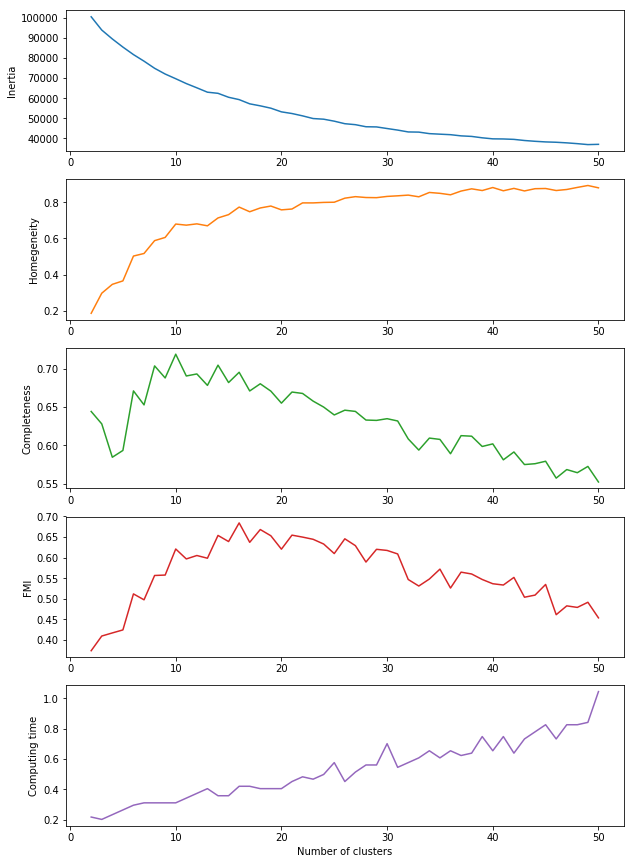

In [5]:
plt.figure(figsize=(10,15))
plt.subplot(5,1,1)
plt.plot(n_cl,I)
plt.ylabel('Inertia')

plt.subplot(5,1,2)
plt.plot(n_cl,H,'tab:orange')
plt.ylabel('Homegeneity')

plt.subplot(5,1,3)
plt.plot(n_cl,C,'tab:green')
plt.ylabel('Completeness')

plt.subplot(5,1,4)
plt.plot(n_cl,F,'tab:red')
plt.ylabel('FMI')

plt.subplot(5,1,5)
plt.plot(n_cl,ttime,'tab:purple')
plt.xlabel('Number of clusters')
plt.ylabel('Computing time')
plt.show()

In [19]:
#Varying the number of clusters in KMeans algorithm, init='random'
I = np.zeros(49)
H = np.zeros(49)
C = np.zeros(49)
F = np.zeros(49)
ttime = np.zeros(49)
n_cl = np.arange(2,51,1)
for i in n_cl:
    start = time.time()
    kmean = KMeans(n_clusters=i, n_init=10, init='random')
    kmean.fit(xdigits)
    
    I[i-2] = kmean.inertia_
    H[i-2] = metrics.homogeneity_score(labels,kmean.labels_)
    C[i-2] = metrics.completeness_score(labels,kmean.labels_)
    F[i-2] = metrics.fowlkes_mallows_score(labels,kmean.labels_)
    ttime[i-2] = time.time()-start

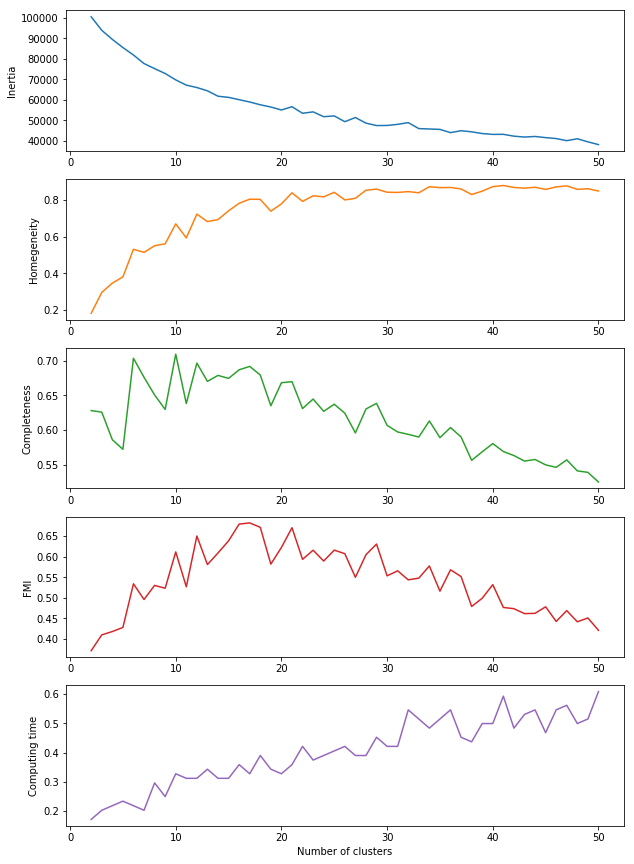

In [20]:
plt.figure(figsize=(10,15))
plt.subplot(5,1,1)
plt.plot(n_cl,I)
plt.ylabel('Inertia')

plt.subplot(5,1,2)
plt.plot(n_cl,H,'tab:orange')
plt.ylabel('Homegeneity')

plt.subplot(5,1,3)
plt.plot(n_cl,C,'tab:green')
plt.ylabel('Completeness')

plt.subplot(5,1,4)
plt.plot(n_cl,F,'tab:red')
plt.ylabel('FMI')

plt.subplot(5,1,5)
plt.plot(n_cl,ttime,'tab:purple')
plt.xlabel('Number of clusters')
plt.ylabel('Computing time')
plt.show()

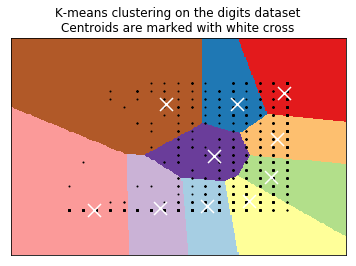

In [10]:
#Plotting the Graph
reduced_data = xdigits[:,4:6]
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=3)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [11]:
#Meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bandwidth=10)
ms.fit(xdigits)
print(ms.labels_.astype(float))
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(xdigits, quantile=0.2, n_samples=30)
print(bandwidth)

H=metrics.homogeneity_score(labels,ms.labels_)  
C=metrics.completeness_score(labels,ms.labels_)
F=metrics.fowlkes_mallows_score(labels,ms.labels_)

print('Homogenity:\t', H)
print('Completeness:\t', C)
print('FMI:\t\t', F)

[0. 0. 0. ... 0. 0. 0.]
8.49091064859037
Homogenity:	 0.00892896436007933
Completeness:	 0.254182772736375
FMI:		 0.312358168516724


In [12]:
Hm = np.zeros(9)
Cm = np.zeros(9)
Fm = np.zeros(9)
ttimem = np.zeros(9)
bw = np.arange(2,11,1)
for i in bw:
    start = time.time()
    ms = MeanShift(bandwidth=i)
    ms.fit(xdigits)
    
    Hm[i-2] = metrics.homogeneity_score(labels,ms.labels_)
    Cm[i-2] = metrics.completeness_score(labels,ms.labels_)
    Fm[i-2] = metrics.fowlkes_mallows_score(labels,ms.labels_)
    ttimem[i-2] = time.time()-start

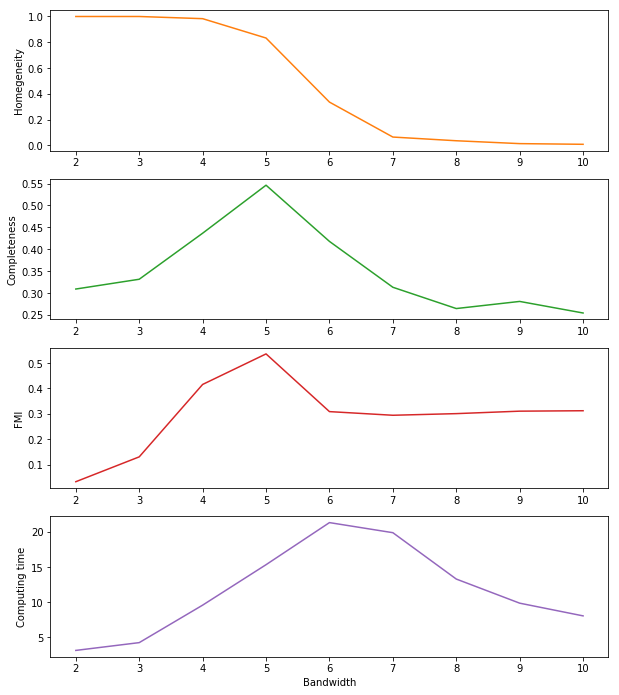

In [13]:
plt.figure(figsize=(10,15))
plt.subplot(5,1,1)
plt.plot(bw,Hm,'tab:orange')
plt.ylabel('Homegeneity')

plt.subplot(5,1,2)
plt.plot(bw,Cm,'tab:green')
plt.ylabel('Completeness')

plt.subplot(5,1,3)
plt.plot(bw,Fm,'tab:red')
plt.ylabel('FMI')

plt.subplot(5,1,4)
plt.plot(bw,ttimem,'tab:purple')
plt.xlabel('Bandwidth')
plt.ylabel('Computing time')
plt.show()

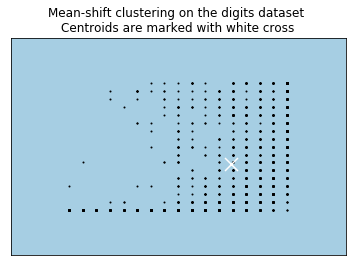

In [14]:
msp = MeanShift(bandwidth=5)

msp.fit(reduced_data)
# Obtain labels for each point in mesh. Use last trained model.
Z = msp.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroidsM = msp.cluster_centers_
plt.scatter(centroidsM[:, 0], centroidsM[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Mean-shift clustering on the digits dataset \n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
#DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=20)
db.fit(xdigits)
print(db.labels_)

H=metrics.homogeneity_score(labels,db.labels_)  
C=metrics.completeness_score(labels,db.labels_)
F=metrics.fowlkes_mallows_score(labels,db.labels_)

print('Homogenity:\t', H)
print('Completeness:\t', C)
print('FMI:\t\t', F)

[0 0 0 ... 0 0 0]
Homogenity:	 0.0020329457054513293
Completeness:	 0.06601405650008295
FMI:		 0.3113281240263827


In [16]:
Hd = np.zeros(39)
Cd = np.zeros(39)
Fd = np.zeros(39)
ttimed = np.zeros(39)
eps = np.arange(2,41,1)
for i in eps:
    start = time.time()
    db = DBSCAN(eps=i, min_samples=40)
    db.fit(xdigits)
    
    Hd[i-2] = metrics.homogeneity_score(labels,db.labels_)
    Cd[i-2] = metrics.completeness_score(labels,db.labels_)
    Fd[i-2] = metrics.fowlkes_mallows_score(labels,db.labels_)
    ttimed[i-2] = time.time() - start    

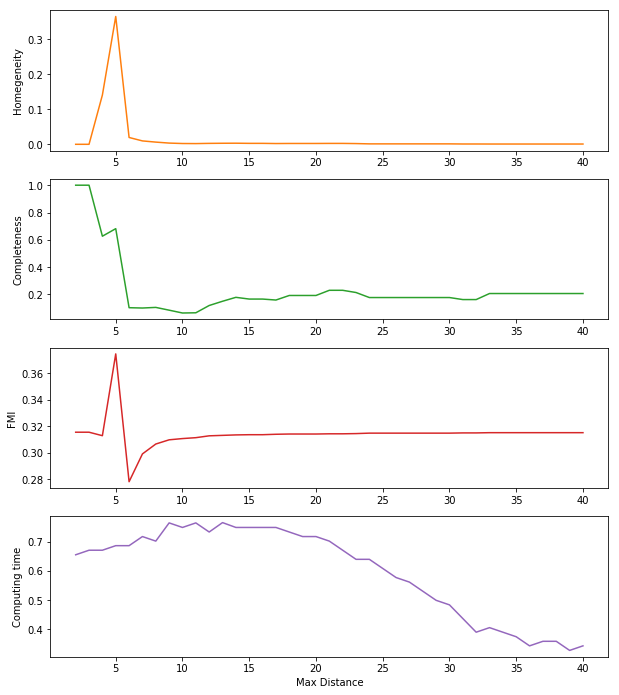

In [17]:
plt.figure(figsize=(10,15))
plt.subplot(5,1,1)
plt.plot(eps,Hd,'tab:orange')
plt.ylabel('Homegeneity')

plt.subplot(5,1,2)
plt.plot(eps,Cd,'tab:green')
plt.ylabel('Completeness')

plt.subplot(5,1,3)
plt.plot(eps,Fd,'tab:red')
plt.ylabel('FMI')

plt.subplot(5,1,4)
plt.plot(eps,ttimed,'tab:purple')
plt.xlabel('Max Distance')
plt.ylabel('Computing time')
plt.show()